<div class="alert alert-block alert-success">
    


## <center>Breadth First Search </center>


</div>
    
    

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import networkx as nx 
from collections import deque
import seaborn as sns

In [2]:
# Requirements: 
# Create graph with 5 levels and no reverse connections
# Create 5 levels with 5 names for every node in the tree 
# You can hard-code the names or create your generator to generate the names for the different levels/nodes

# create a balanced tree in networkx, where each node has 5 children and the tree height is 5 levels
G = nx.balanced_tree(r=5, h=5)
# convert networkx graph to a dictionary of lists
graph = nx.to_dict_of_lists(G)
# remove connections to parent node
for kk in graph:
    if kk > 0: # if not root
        graph[kk].pop(0)

# check length of dict against expected number of nodes (1 + 5 + 25 + 125 + 625 + 3125)
assert len(graph) == sum([5**ii for ii in range(5 + 1)])
# check # terminal/leaf nodes against expected number (3125), 
# and also confirming that leaf nodes have no children
assert len([vv for kk, vv in graph.items() if not vv]) == 3125

In [3]:
# print partial view of the graph (dict of lists)
# in this graph, the node labels or "names" are integers, starting from zero (root)
dict(list(graph.items())[:10])

{0: [1, 2, 3, 4, 5],
 1: [6, 7, 8, 9, 10],
 2: [11, 12, 13, 14, 15],
 3: [16, 17, 18, 19, 20],
 4: [21, 22, 23, 24, 25],
 5: [26, 27, 28, 29, 30],
 6: [31, 32, 33, 34, 35],
 7: [36, 37, 38, 39, 40],
 8: [41, 42, 43, 44, 45],
 9: [46, 47, 48, 49, 50]}

In [4]:
# print partial view of the leaf nodes
dict(list(graph.items())[-10:])

{3896: [],
 3897: [],
 3898: [],
 3899: [],
 3900: [],
 3901: [],
 3902: [],
 3903: [],
 3904: [],
 3905: []}

In [5]:
# get the range of node labels ("names") for each level
total_nodes = [5**ii for ii in range(5 + 1)]
level_start = [0, 1]
level_start.extend([sum(total_nodes[:ii]) for ii in range(2, 6)])
level_stop = [0, 5]
level_stop.extend([sum(total_nodes[:ii])-1 for ii in range(2, 6)][1:])
level_stop.append(len(graph)-1)

print('root: node 0')
for ii in range(1, 6): print(f'level {ii}: nodes {level_start[ii]} to {level_stop[ii]}')

root: node 0
level 1: nodes 1 to 5
level 2: nodes 6 to 30
level 3: nodes 31 to 155
level 4: nodes 156 to 780
level 5: nodes 781 to 3905


In [6]:
# breadth-first search algorithm modified from Bhargava
# search a graph (here, dictionary of lists) for a target node, returning True if found, False otherwise
def bfs(graph, root, target):
    search_queue = deque()
    search_queue += graph[root] # start with children of root
    # This array is how you keep track of which people you've searched before.
    searched = []
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:
            if person == target:
                return True
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.append(person)
    return False

In [7]:
# Requirement:
# Search for the 3 names (pick any random nodes) in every level

level_list, node_list, search_time_list = [[] for xx in range(3)]
np.random.seed(0)
# iterate through each level
for current_level in range(1, 6):
    # pick 3 random nodes without replacement
    selected_nodes = np.random.choice(np.arange(level_start[current_level], level_stop[current_level]+1),
                                      size=3, replace=False)
    # print('Level', current_level, 'nodes to search for:', selected_nodes)
    
    # perform bfs on each random node and get execution time
    for current_node in selected_nodes:
        start = time.perf_counter()
        bfs(graph=graph, root=0, target=current_node)
        end = time.perf_counter()
        
        # gather data
        search_time_list.append((end - start) * 1000)
        level_list.append(current_level)
        node_list.append(current_node)

# Create DataFrame for the results
df = pd.DataFrame({'level':level_list, 'node_searched':node_list, 'execution_time':search_time_list})        
df

,level,node_searched,execution_time
0,1,3,0.005208
1,1,1,0.000833
2,1,2,0.001000
3,2,8,0.004167
4,2,26,0.012500
5,2,29,0.014125
6,3,38,0.022000
7,3,55,0.034583
8,3,58,0.036834
9,4,628,2.477792


In [8]:
# Requirement:
# Caculate the average execution time to search 3 names for every level
dfg = df.groupby('level')['execution_time'].mean().reset_index().rename(columns={'execution_time':'mean_execution_time'})
dfg

,level,mean_execution_time
0,1,0.002347
1,2,0.010264
2,3,0.031139
3,4,3.004139
4,5,48.962903


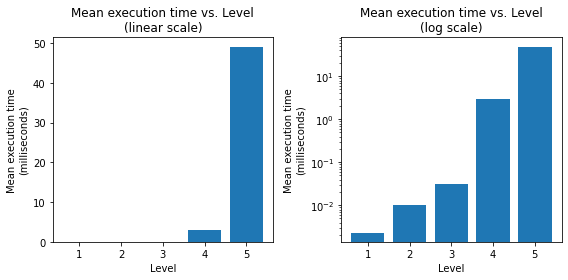

In [9]:
# Requirement:
# Create bar chart to plot the average execution time for the different levels
# level number on x-axis and average time on y-axis

# to better visualize values for levels 1, 2, & 3, mean execution times were also plotted on a log scale
fig, axs = plt.subplots(1,2, figsize=(8,4))
for ax in axs:
    ax.bar(x=dfg['level'], height=dfg['mean_execution_time'])
    ax.set(xlabel='Level', ylabel='Mean execution time\n(milliseconds)')
axs[1].set_yscale('log')
axs[0].set_title('Mean execution time vs. Level\n(linear scale)')
axs[1].set_title('Mean execution time vs. Level\n(log scale)')
fig.tight_layout()
plt.show()

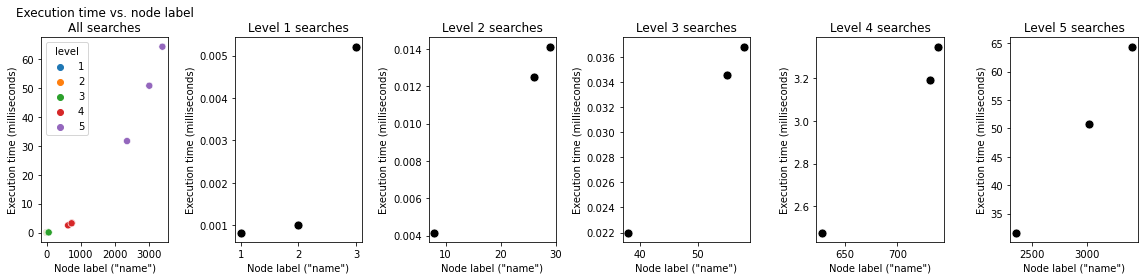

In [10]:
# plot execution times of all searches to visualize search times within each level
fig, axs = plt.subplots(1, df['level'].nunique()+1, figsize=(16, 4))
sns.scatterplot(x='node_searched', y='execution_time', data=df, hue='level', palette='tab10', s=50, ax=axs[0])
axs[0].set_title('Execution time vs. node label\nAll searches')
for xx in df['level'].unique():
    sns.scatterplot(x='node_searched', y='execution_time', data=df[df['level']==xx], color='k', s=80, ax=axs[xx])
    axs[xx].set_title(f'Level {xx} searches')
for ax in axs:
    ax.set(ylabel='Execution time (milliseconds)', xlabel='Node label ("name")')
fig.tight_layout()

<div class="alert alert-block alert-danger">
    
    

### Requirements: 
- Modify the provided code snippets to measure the performance of the BFS algorithm
- Create 5 levels with 5 names for every node in the tree 
- You can  hard-code the names or create your generator to generate the names for the different levels/nodes
- Search for the 3 names (pick any random nodes) in every level
- Caculate the average execution time to search 3 names for every level
- Create bar chart to plot the average execution time for the different levels
- Provide your comparative analysis for the different runs/searches at the different level






<br>
    
</div>

#### Breadth-first search (BFS)
* BFS is an algorithm for searching a graph or tree data structure for a node that meets a given property.
    * We start at the root and scan each node in the first level, moving from left to right. 
    * We then scan each node in the next level, moving from left to right. 
    * We continue this operation until we have found the node we are searching for, or until we have scanned all the nodes.


* Time complexity: 
    * If we search the entire graph/tree, we will follow each edge and the running time is at least O(E), where E is the number of edges. 
    * We will also need a queue for every node/vertex to search. Adding a vertex to the queue takes constant time. Adding every vertex will take O(V) total, where V is the number of vertices. 
    * Taken together, BFS has time complexity of O(V+E) (Bhargava, 2016).


* Space complexity:
    * While scanning the current level, we need to know which nodes to visit once we go to the next level. To do this, we store pointers to the current level’s children in a queue (a First In, First Out data structure). Thus, BFS will have to store at least an entire level of nodes in the queue; the required memory is dependent on how wide the graph is.
    * “When the number of vertices in the graph is known ahead of time, and additional data structures are used to determine which vertices have already been added to the queue, the space complexity can be expressed as O(V), where V is the number of vertices. This is in addition to the space required for the graph itself, which may vary depending on the graph representation used by an implementation of the algorithm.” (ref: https://en.wikipedia.org/wiki/Breadth-first_search)

#### Results
* In this experiment, mean search times appeared to increase exponentially with increasing levels. Mean search time was much longer for level 5 compared to level 4, and much longer for level 4 compared to level 3, and so on (Figures in cells 9 and 10). We saw that when plotted on the same linear scale, mean search times for levels 1, 2, and 3 were not visible (Figure in cell 9). 


* This result was expected because BFS takes O(V+E) time. In this balanced tree, the number of nodes and edges grew exponentially at each additional level. For example, the number of nodes scaled as 5<sup>N</sup> for each level, where N = level. That is, there were at most 5 nodes to scan and edges to follow when searching for a node in level 1, compared to at most 3905 nodes to scan and edges to follow when searching for a node in level 5 (with 3125 of those nodes in level 5 alone).


* Within each level, since nodes are added to the queue from left to right, we would expect longer search times for nodes with larger node/integer labels. (As explained above, in this graph, node "names" are represented using integers.) Indeed, this was what we observed in the experiment (Figure in cell 10). 


* Consistent with the above observation, we would expect node 3905 (level 5, rightmost node) to have the longest search time based on the order of traversal. In this worst-case scenario, every node and every edge will need to be explored. The above observation also means that the mean search time for a given level is highly dependent on the randomly selected nodes, especially for deeper levels of the tree. For example, possible node labels for level 5 range from 781 to 3905, but here, the 3 randomly selected node labels were all >2300.

#### Conclusions
Data engineers should consider (1) the structure of the graph/tree and (2) the number and location of the solutions (target nodes) when considering to use BFS or an alternative search algorithm such as depth-first search (DFS). 


Example considerations:
* If we want to find the shortest path to a node from a given source, we should use BFS (Bhargava, 2016). 
* If we know that the node we are searching for is not far from the root, BFS may be a good choice. Alternatively, if we know that the solution is deep in the tree, DFS may be preferred. We saw in this experiment the large difference in mean search time as we searched deeper into the tree using BFS. 
* If the tree is very wide, BFS may need too much memory to add an entire level of nodes in the queue. 

In practice, data engineers may need to experiment in order to determine the best approach for each use case. 

#### References
* Bhargava, A. Y. (2016.) Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People. Shelter Island, N.Y.: Manning.



